In [5]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
pf_data.tail()

,PG,^GSPC
Date,,
2020-02-03,125.110001,3248.919922
2020-02-04,125.660004,3297.590088
2020-02-05,126.809998,3334.689941
2020-02-06,127.139999,3345.780029
2020-02-07,126.080002,3327.709961


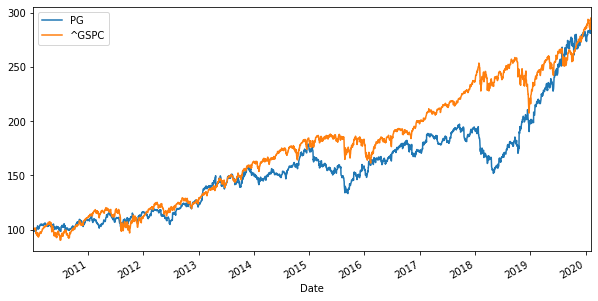

In [6]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [7]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [8]:
log_returns.mean() * 250

PG       0.102789
^GSPC    0.106004
dtype: float64

In [9]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.021597,0.011233
^GSPC,0.011233,0.021633


In [10]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.519702
^GSPC,0.519702,1.000000


In [11]:
num_assets = len(assets)

In [12]:
num_assets

2

In [13]:
arr = np.random.random(2)
arr

array([0.69978751, 0.85024933])

In [14]:
weights = np.random.random(num_assets)
weights /=np.sum(weights)
weights

array([0.24444758, 0.75555242])

In [15]:
weights[0] + weights[1]

1.0